# TITANIC SURVIVAL CHALLANGE

### 1. Import packages and files

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
### 1. Import
train, test = pd.read_csv('train.csv', index_col = [0]), pd.read_csv('test.csv', index_col = [0])
### 2. Change Sex to numeric
train.loc[train.Sex == 'male', 'Sex'], train.loc[train.Sex == 'female', 'Sex'] = 1, 0
test.loc[test.Sex == 'male', 'Sex'], test.loc[test.Sex == 'female', 'Sex']= 1, 0
### 3. Change Cabin
train.Cabin = train.Cabin.apply(lambda x: x if type(x) == float else x[0])
test.Cabin = test.Cabin.apply(lambda x: x if type(x) == float else x[0])
### 4. Drop Name
#train.drop(['Name'], axis = 1, inplace=True)
#test.drop(['Name'], axis = 1, inplace=True)
### 5. Try Ticket
train.Ticket = train.Ticket.apply(lambda x: 0 if x == 'LINE' else int(x.split()[-1]))
test.Ticket = test.Ticket.apply(lambda x: 0 if x == 'LINE' else int(x.split()[-1]))
print('Shapes: train: {}\ttest: {}'.format(train.shape, test.shape))
train.head()

Shapes: train: (891, 11)	test: (418, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 2. Handling Title
Here we extract information about the person title (e.g. Miss, Mr., Mrs.). <br>
Values that doen't appear very often in the datatset are changed to "Rare".**

In [3]:
test_titles = []
for name in test.Name.values:
    words = name.split()
    n = 0
    for word in words:
        if word[-1] == '.' and len(word) > 2:
            #print(word)
            test_titles.append(word)
            n += 1
    if n != 1:
        print(name)
test['Title'] = test_titles
rare_titles = test.Title.value_counts()[test.Title.value_counts() < 10].index
test.loc[test.Title.isin(rare_titles), 'Title'] = 'Rare'
test.drop(['Name'], axis = 1, inplace=True)
print(test.Title.value_counts())

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Rare         7
Name: Title, dtype: int64


In [4]:
train_titles = []
for name in train.Name.values:
    words = name.split()
    n = 0
    for word in words:
        if word[-1] == '.' and len(word) > 2:
            #print(word)
            train_titles.append(word)
            n += 1
train['Title'] = train_titles
rare_titles = train.Title.value_counts()[train.Title.value_counts() < 10].index
train.loc[train.Title.isin(rare_titles), 'Title'] = 'Rare'
print(train.Title.value_counts())
train.drop(['Name'], axis = 1, inplace=True)
train.head()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Rare        27
Name: Title, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,21171,7.2500,NaN,S,Mr.
2,1,1,0,38.0,1,0,17599,71.2833,C,C,Mrs.
3,1,3,0,26.0,0,0,3101282,7.9250,NaN,S,Miss.
4,1,1,0,35.0,1,0,113803,53.1000,C,S,Mrs.
5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [5]:
na_cols_train = train.columns[train.isna().any()]
na_cols_test = test.columns[test.isna().any()]
na_train = zip(na_cols_train, [train[train[col].isna()].shape[0] for col in na_cols_train])
na_test = zip(na_cols_test, [test[test[col].isna()].shape[0] for col in na_cols_test])
print('NA in train:', end = '\t')
for col, n in na_train:
     print('({}: {})'.format(col, n), end='\t')
print('\nNA in test:', end = '\t')
for col, n in na_test:
     print('({}: {})'.format(col, n), end='\t')

NA in train:	(Age: 177)	(Cabin: 687)	(Embarked: 2)	
NA in test:	(Age: 86)	(Fare: 1)	(Cabin: 327)	

In [6]:
def ohe(df, col_name):
    df = df.copy()
    for value in df.loc[:, col_name].value_counts().index:
        df['{}_{}'.format(col_name, value)] = df.loc[:, col_name].apply(lambda x: 1 if x == value else 0)
    df['{}_{}'.format(col_name, 'NAN')] = df.loc[:, col_name].apply(lambda x: 1 if type(x) == float else 0)
    df.drop([col_name], axis = 1, inplace=True)
    return df

train2 = ohe(train, 'Cabin')
train2 = ohe(train2, 'Embarked')
train2 = ohe(train2, 'Title')
test2 = ohe(test, 'Cabin')
test2 = ohe(test2, 'Embarked')
test2 = ohe(test2, 'Title')
train2.drop(['Cabin_T'], axis=1, inplace=True)
train2.drop(['Title_NAN'], axis=1, inplace=True)
test2.drop(['Title_NAN'], axis=1, inplace=True)
test2.loc[test2.Fare.isna(), 'Fare'] = test2.Fare.mean()
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_C,Cabin_B,...,Cabin_NAN,Embarked_S,Embarked_C,Embarked_Q,Embarked_NAN,Title_Mr.,Title_Miss.,Title_Mrs.,Title_Master.,Title_Rare
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,21171,7.2500,0,0,...,1,1,0,0,0,1,0,0,0,0
2,1,1,0,38.0,1,0,17599,71.2833,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,3,0,26.0,0,0,3101282,7.9250,0,0,...,1,1,0,0,0,0,1,0,0,0
4,1,1,0,35.0,1,0,113803,53.1000,1,0,...,0,1,0,0,0,0,0,1,0,0
5,0,3,1,35.0,0,0,373450,8.0500,0,0,...,1,1,0,0,0,1,0,0,0,0


In [7]:
na_cols_train = train2.columns[train2.isna().any()]
na_cols_test = test2.columns[test2.isna().any()]
na_train = zip(na_cols_train, [train2[train2[col].isna()].shape[0] for col in na_cols_train])
na_test = zip(na_cols_test, [test2[test2[col].isna()].shape[0] for col in na_cols_test])
print('NA in train:', end = '\t')
for col, n in na_train:
     print('({}: {})'.format(col, n), end='\t')
print('\nNA in test:', end = '\t')
for col, n in na_test:
     print('({}: {})'.format(col, n), end='\t')
print('\nShapes: train: {}\ttest: {}'.format(train2.shape, test2.shape))

NA in train:	(Age: 177)	
NA in test:	(Age: 86)	
Shapes: train: (891, 25)	test: (418, 24)


In [8]:
train2.corr().iloc[0, :].sort_values()

Title_Mr.       -0.549199
Pclass          -0.338481
Cabin_NAN       -0.316912
Embarked_S      -0.155660
Ticket          -0.095605
Age             -0.077221
SibSp           -0.035322
Embarked_Q       0.003650
Cabin_G          0.016040
Title_Rare       0.022030
Cabin_A          0.022287
Cabin_F          0.057935
Embarked_NAN     0.060095
Parch            0.081629
Title_Master.    0.085221
Cabin_C          0.114652
Cabin_E          0.145321
Cabin_D          0.150716
Embarked_C       0.168240
Cabin_B          0.175095
Fare             0.257307
Title_Miss.      0.327093
Title_Mrs.       0.339040
Survived         1.000000
Name: Survived, dtype: float64

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR

In [10]:
age_df = pd.concat([train2.iloc[:, 1:], test2], sort = True)
print('Shape:', age_df.shape)
print('NA on cols: {}'.format(age_df.columns[age_df.isna().any()]))
print('Mean Age: {}; SD Age: {}'.format(age_df.Age.mean(), age_df.Age.std()))
age_df.head()

Shape: (1309, 24)
NA on cols: Index(['Age'], dtype='object')
Mean Age: 29.881137667304014; SD Age: 14.413493211271321


,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_NAN,Embarked_C,...,Parch,Pclass,Sex,SibSp,Ticket,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,0,0,0,0,0,0,0,1,0,...,0,3,1,1,21171,0,0,1,0,0
2,38.0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,17599,0,0,0,1,0
3,26.0,0,0,0,0,0,0,0,1,0,...,0,3,0,0,3101282,0,1,0,0,0
4,35.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,113803,0,0,0,1,0
5,35.0,0,0,0,0,0,0,0,1,0,...,0,3,1,0,373450,0,0,1,0,0


In [11]:
age_train, age_test = age_df[age_df.Age.isna() == False], age_df[age_df.Age.isna()]
print('Shapes of train and test: ', age_train.shape, age_test.shape)
X, y = age_train.iloc[:, 1:].values, age_train.iloc[:, 0].values
print('Shapes of X, y: ', X.shape, y.shape)

Shapes of train and test:  (1046, 24) (263, 24)
Shapes of X, y:  (1046, 23) (1046,)


In [12]:
def evaluate(model, X, y, n_splits = 5, random_state = 42):
    kf = KFold(n_splits = n_splits, random_state = random_state, shuffle = True)
    
    scaler = MinMaxScaler()
    rmse, mae = [], []

    for train_index, test_index in kf.split(X):
        # 1. Init train, test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # 2. Scaling 
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # 3. Training
        model.fit(X_train ,y_train)
        # 4. Evaluation
        y_pred = model.predict(X_test)
        rmse.append(mean_squared_error(y_test, y_pred)**0.5)
        mae.append(mean_absolute_error(y_test, y_pred))

    print('RMSE: {}\nMAE: {}'.format(rmse, mae))
    return rmse, mae

rf1, rf2 = evaluate(RandomForestRegressor(), X, y)
svm1, svm2 = evaluate(SVR(), X, y)
lm1, lm2 = evaluate(LinearRegression(), X, y)

RMSE: [10.44674655861791, 11.433245722307488, 10.387028783070427, 11.490918386657935, 12.532790391607419]
MAE: [7.874082440287226, 8.541699413305992, 7.9198681315202615, 8.704335178856232, 9.793938965595808]
RMSE: [10.297008719143928, 12.592013886895268, 11.715842535572754, 11.558030380703428, 13.328500017889148]
MAE: [8.067019186475134, 9.602441345846966, 8.957971717838022, 8.949936057883912, 10.316110001172772]
RMSE: [10.630631034443638, 11.050187710847997, 14247693452284.393, 10.871788853224873, 11.974771122781208]
MAE: [8.535333333333334, 8.43921052631579, 985533563776.059, 8.823853216121524, 9.467521556445691]


In [13]:
model = RandomForestRegressor()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
model.fit(X, y)
y_pred = model.predict(X)
print('MAE: {}'.format(np.round(mean_absolute_error(y_pred, y), 3)))
X_test =  age_test.iloc[:, 1:].values
age_df.loc[age_df.Age.isna(), 'Age'] = model.predict(X_test)
print('Any NA: {}'.format(age_df.isna().any().any()))

MAE: 3.302
Any NA: False


In [15]:
train2, test2 = age_df.loc[train2.index, age_df.columns], age_df.loc[test2.index, age_df.columns]
train2['Survived'] = train['Survived']
print('Shape of train and test:', train2.shape, test2.shape)
print('Any NA in train and test?', train2.isna().any().any(), test2.isna().any().any())
train2.head()

Shape of train and test: (891, 25) (418, 24)
Any NA in train and test? False False


,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_NAN,Embarked_C,...,Pclass,Sex,SibSp,Ticket,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,0,0,0,0,0,0,0,1,0,...,3,1,1,21171,0,0,1,0,0,0
2,38.0,0,0,1,0,0,0,0,0,1,...,1,0,1,17599,0,0,0,1,0,1
3,26.0,0,0,0,0,0,0,0,1,0,...,3,0,0,3101282,0,1,0,0,0,1
4,35.0,0,0,1,0,0,0,0,0,0,...,1,0,1,113803,0,0,0,1,0,1
5,35.0,0,0,0,0,0,0,0,1,0,...,3,1,0,373450,0,0,1,0,0,0


In [15]:
def evaluate(model, X, y, n_splits = 10, random_state = 42):
    kf = KFold(n_splits = n_splits, random_state = random_state, shuffle = True)
    
    scaler = MinMaxScaler()
    accuracy = []

    for train_index, test_index in kf.split(X):
        # 1. Init train, test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # 2. Scaling 
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        # 3. Training
        model.fit(X_train ,y_train)
        # 4. Evaluation
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_pred, y_test))
    
    print('Accuracy: ', np.round(accuracy, 4), 'Mean: ', np.round(np.mean(accuracy), 4))
    return accuracy, model

X, y = train2.iloc[:, :-1].values, train.loc[:, 'Survived'].values
rf, model1 = evaluate(RandomForestClassifier(n_estimators=100), X, y)
svm, model2 = evaluate(SVC(), X, y)
lm, model3  = evaluate(LogisticRegression(), X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Ensamble with all features

In [ ]:
### GRID SEARCH
np.random.seed(42)
rforest = RandomForestClassifier()
parameters = {'n_estimators': [10, 30, 80, 160], 
              'max_features': ['auto', 5, 9, 15],
              'max_depth': ['None', 4, 6, 8, 10, 12]}
gridCV1 = GridSearchCV(rforest, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV1.fit(X, y)
print('Best parameters:\n{}'.format(gridCV1.best_params_))

svm = SVC()
parameters = {'C': [0, 0.1, 0.5, 1], 
              'kernel': ('rbf', 'poly', 'linear'),
              'gamma': ('scale', 'auto')}
gridCV2 = GridSearchCV(svm, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV2.fit(X, y)
print('Best parameters:\n{}'.format(gridCV2.best_params_))

glm = LogisticRegression()
parameters = {'C': [0, 0.1, 0.5, 1], 
              'kernel': ['rbf', 'poly', 'linear'],
              'gamma': ['scale', 'auto']}
gridCV3 = GridSearchCV(glm, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV3.fit(X, y)
print('Best parameters:\n{}'.format(gridCV3.best_params_))

In [141]:
model1, model2, model3 = RandomForestClassifier(**gridCV1.best_params), SVC(**gridCV2.best_params), LogisticRegression(**gridCV3.best_params)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
X_test = scaler.fit_transform(test2.values)
y1, y2, y3 = model1.predict(X_test), model2.predict(X_test), model3.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test2.index,
        "Survived_1": y1,
        "Survived_2": y2,
        "Survived_3": y3
    })
submission['Survived'] = submission.Survived_1 + submission.Survived_2 + submission.Survived_3
submission['Survived'] = submission['Survived'].apply(lambda x: 1 if x > 1 else 0)
submission.drop(submission.columns[1:-1], axis=1, inplace=True)
submission.to_csv('/kaggle/working/submission_ensamble_2.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Less Features

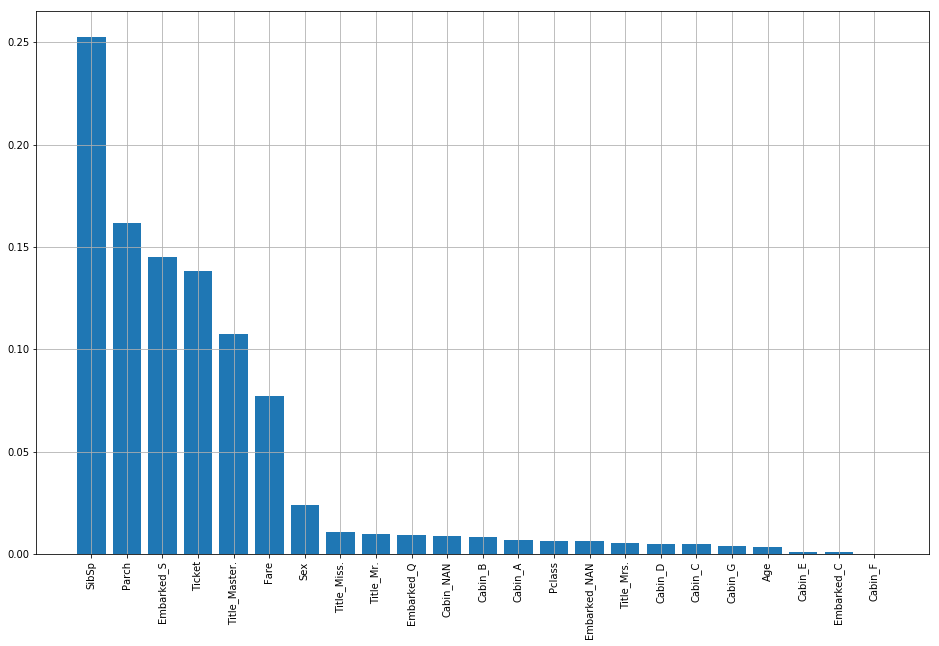

In [148]:
imp = zip(model.feature_importances_, test2.columns)
imp = sorted(imp, reverse = True)
plt.figure(figsize=(16, 10))
plt.bar([i[1] for i in imp], [i[0] for i in imp])
plt.xticks(np.arange(len(imp)), [i[1] for i in imp], rotation=90)
plt.grid()
plt.show()

In [140]:
for n in range(test2.shape[1]):
    best_feat = [i[1] for i in imp][:-n]
    #print('Best features: {}'.format(best_feat))
    print('Number of features: '.format(len(best_feat)))
    train2_less, test2_less = train2.loc[:, best_feat], test2.loc[:, best_feat]
    rf, model1 = evaluate(RandomForestClassifier(n_estimators=100), train2_less.values, y)
    svm, model2 = evaluate(SVC(), train2_less.values, y)
    lm, model3  = evaluate(LogisticRegression(), train2_less.values, y)

Best features: ['SibSp', 'Parch', 'Embarked_S', 'Ticket', 'Title_Master.', 'Fare', 'Sex', 'Title_Miss.', 'Title_Mr.', 'Embarked_Q', 'Cabin_NAN', 'Cabin_B', 'Cabin_A', 'Pclass', 'Embarked_NAN', 'Title_Mrs.']
Accuracy:  [0.8111 0.8427 0.7865 0.764  0.8315 0.8427 0.7978 0.809  0.8652 0.8315] Mean:  0.8182
Accuracy:  [0.8444 0.7753 0.8427 0.7978 0.8652 0.9101 0.809  0.809  0.764  0.8989] Mean:  0.8316
Accuracy:  [0.8444 0.764  0.8427 0.7978 0.8427 0.8652 0.7865 0.7978 0.7865 0.8876] Mean:  0.8215


In [145]:
### GRID SEARCH
np.random.seed(42)
rforest = RandomForestClassifier()
parameters = {'n_estimators': [10, 30, 80, 160], 
              'max_features': ['auto', 5, 9, 15],
              'max_depth': ['None', 4, 6, 8, 10, 12]}
gridCV1 = GridSearchCV(rforest, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV1.fit(train2_less, y)
print('Best parameters:\n{}'.format(gridCV1.best_params_))

svm = SVC()
parameters = {'C': [0, 0.1, 0.5, 1], 
              'kernel': ['rbf', 'poly', 'linear'],
              'gamma': ['scale', 'auto']}
gridCV2 = GridSearchCV(svm, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV2.fit(train2_less, y)
print('Best parameters:\n{}'.format(gridCV2.best_params_))

svm = SVC()
parameters = {'C': [0, 0.1, 0.5, 1], 
              'kernel': ['rbf', 'poly', 'linear'],
              'gamma': ['scale', 'auto']}
gridCV3 = GridSearchCV(svm, parameters, cv=5, verbose=2, scoring='accuracy', n_jobs=-1)
gridCV3.fit(train2_less, y)
print('Best parameters:\n{}'.format(gridCV3.best_params_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   37.1s finished


Best parameters:
{'max_depth': 8, 'max_features': 15, 'n_estimators': 80}


In [ ]:
model1, model2, model3 = RandomForestClassifier(gridCV1.best_params), SVC(gridCV3.best_params), LogisticRegression(gridCV3.best_params)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
model1.fit(train2_less, y)
model2.fit(train2_less, y)
model3.fit(train2_less, y)

X_test = scaler.fit_transform(test2_less.values)
y1, y2, y3 = model1.predict(X_test), model2.predict(X_test), model3.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test2.index,
        "Survived_1": y1,
        "Survived_2": y2,
        "Survived_3": y3
    })
submission['Survived'] = submission.Survived_1 + submission.Survived_2 + submission.Survived_3
submission['Survived'] = submission['Survived'].apply(lambda x: 1 if x > 1 else 0)
submission.drop(submission.columns[1:-1], axis=1, inplace=True)
submission.to_csv('/kaggle/working/submission_ensamble_less.csv', index=False)
submission.head()